In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

朴素感知机单层网络 激活函数为阶跃函数
多层感知机神经网络 激活函数使用平滑的非线性

In [75]:
#step_function
def step_function(x):
    if x>0:
        return 1
    else:
        return 0
    
step_function(2)

1

不允许传入array 可以用小技巧改进\
astype()通过参数指定转换类型

In [76]:
def step_function(x):
    #生成bool型数组
    y = x>0
    #再转成int型输出
    return y.astype(int)

step_function(np.array([-1,2]))

array([0, 1])

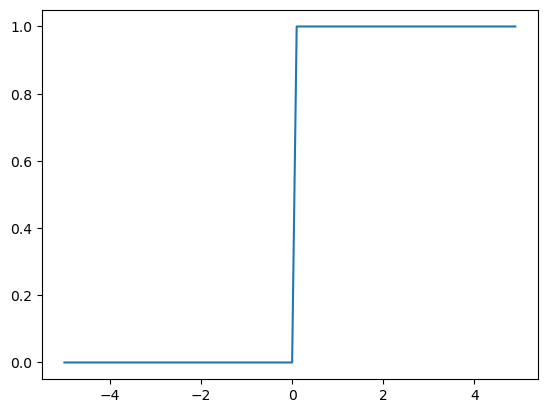

In [77]:
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.show()

Sigmoid

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

sigmoid(1)
sigmoid(np.array([1,2,3]))
#因为广播机制 exp(-x)计算后会生成array 所以之后的计算将在array中各个元素进行 因而也生成array

array([0.73105858, 0.88079708, 0.95257413])

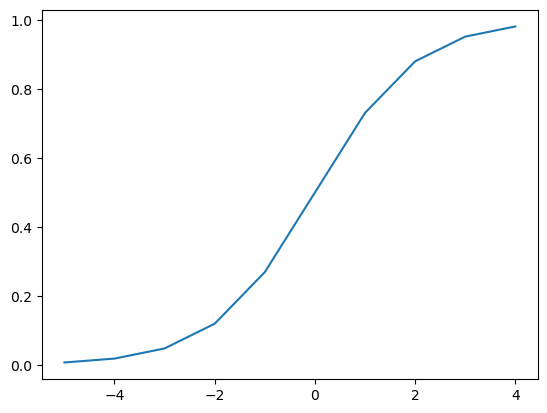

In [79]:
x = np.arange(-5.0,5.0)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

ReLU


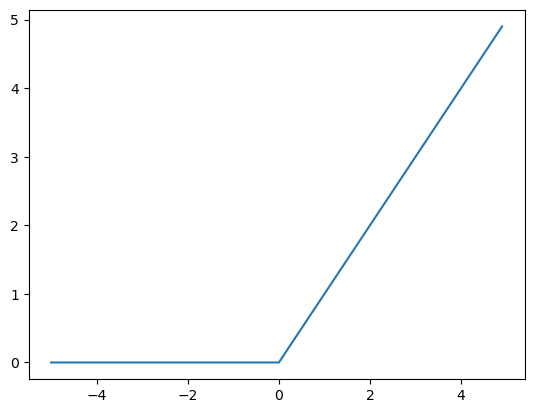

In [80]:
def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.plot(x,y)
plt.show()

In [81]:
a = np.array([1,2,3,4])
a,np.ndim(a),a.shape,a.shape[0]

(array([1, 2, 3, 4]), 1, (4,), 4)

In [82]:
b = np.array([[1,2],[3,4],[5,6]])
b,np.ndim(b),b.shape

(array([[1, 2],
        [3, 4],
        [5, 6]]),
 2,
 (3, 2))

In [83]:
b.shape[0],b.shape[1]

(3, 2)

In [84]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
a,b,a.shape,b.shape

(array([[1, 2],
        [3, 4]]),
 array([[5, 6],
        [7, 8]]),
 (2, 2),
 (2, 2))

np.dot是矩阵乘法 直接乘是对应元素相乘

In [85]:
np.dot(a,b),a*b

(array([[19, 22],
        [43, 50]]),
 array([[ 5, 12],
        [21, 32]]))

In [4]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2],[3,4],[5,6]])
a,b,a.shape,b.shape
a[1,2]

6

In [87]:
np.dot(a,b)

array([[22, 28],
       [49, 64]])

In [88]:
a = np.array([[1,2],[3,4],[5,6]])
b = np.array([7,8])
a.shape,b.shape,np.dot(a,b)

((3, 2), (2,), array([23, 53, 83]))

In [89]:
x = np.array([1,2])
w = np.array([[1,3,5],[2,4,6]])
x.shape,w.shape

((2,), (2, 3))

In [90]:
y = np.dot(x,w)
y

array([ 5, 11, 17])

In [91]:
x = np.array([1.0,0.5])
w1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
b1 = np.array([0.1,0.2,0.3])
x.shape,w1.shape,b1.shape
x,w1,b1

(array([1. , 0.5]),
 array([[0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]]),
 array([0.1, 0.2, 0.3]))

In [92]:
a1 = np.dot(x,w1)+b1
a1

array([0.3, 0.7, 1.1])

In [93]:
z1 = sigmoid(a1)
z1

array([0.57444252, 0.66818777, 0.75026011])

In [94]:
w2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
b2 = np.array([0.1,0.2])
z1.shape,w2.shape,b2.shape
z1,w2,b2

(array([0.57444252, 0.66818777, 0.75026011]),
 array([[0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]]),
 array([0.1, 0.2]))

In [95]:
a2 = np.dot(z1,w2)+b2
a2

array([0.51615984, 1.21402696])

In [96]:
z2 = sigmoid(a2)
z2

array([0.62624937, 0.7710107 ])

In [ ]:
w3 = np.array([[0.1,0.3],[0.2,0.4]])
b3 = np.array([0.1,0.2])
a3 = np.dot(z2,w3)+b3
y = a3
y
np.argmax(w3)

In [14]:
w3 = np.array([[0.4,0.3],[0.2,0.4]])
w3 = w3.argmax(axis=1)
w3

array([0, 1], dtype=int64)

输出层所用的激活函数用σ(),中间隐藏层的激活函数用h()表示\
回归用恒等函数 二分类用sigmoid 多分类用softmax

softmax实现

In [12]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum = np.sum(exp_a)
    y = exp_a/sum
    
    return y

softmax([0.3,2.9,4.0])

array([0.01821127, 0.24519181, 0.73659691])

softmax可能会溢出 推导可以发现softmax计算时里面的array加上或减去某个常数并不会改变运算结果\
为防止溢出 减去max(x) 进行计算

In [13]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum = np.sum(exp_a)
    y = exp_a/sum
    
    return y

a = np.array([1010,1000,990])
softmax(a)


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

softmax输出值之和总是1 这样才可以把softmax输出解释为 概率

In [100]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)
y,np.sum(y)

(array([0.01821127, 0.24519181, 0.73659691]), 1.0)

学习 推理\
输出层神经元一般设定为类别数

In [101]:
import urllib.request
import os.path
import os
import gzip
import pickle
import numpy as np

In [102]:
dataset_dir = os.path.dirname(os.path.abspath('exercise.ipynb'))
dataset_dir,os.path.abspath('exercise.ipynb')
#os.path.abspath获取文件的绝对路径
#在使用os.path.dirname获取该文件的目录路径

('d:\\deeplearningfromScratch\\mycode\\chapter3',
 'd:\\deeplearningfromScratch\\mycode\\chapter3\\exercise.ipynb')

In [103]:
save_file = os.path.join(dataset_dir,'mnist.pkl')

In [104]:
url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

In [105]:
train_num = 60000
test_num = 10000
img_dim = (1,28,28)
img_size = 784

In [106]:
for v in key_file.values():
    print(v)

train-images-idx3-ubyte.gz
train-labels-idx1-ubyte.gz
t10k-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz


In [107]:
def downloadfile(file_name):
    file_path = os.path.join(dataset_dir,file_name)
    
    if os.path.exists(file_path):
        return
    
    print('Dowinloading'+file_name+'ljjhhhh')
    urllib.request.urlretrieve(url_base+file_name,file_path)
    print('Done!!!')

In [108]:
def download_mnist():
    for v in key_file.values():
        downloadfile(v)

函数的作用是读取指定的标签文件，并将其转换为NumPy数组。具体流程如下：\

1.根据file_name和dataset_dir拼接出标签文件的完整路径file_path。\

2.打开标签文件，使用gzip.open()函数以二进制模式打开文件。\

3.使用np.frombuffer()函数从文件中读取数据，并将其转换为NumPy数组。在读取数据时，使用np.uint8类型指定数据类型，offset=8表示从文件的第8个字节开始读取数据，跳过了文件的前8个字节，因为前8个字节是文件的元数据。\

4.将读取到的标签数据保存在labels变量中。labels是array类型\

5.输出提示信息，表示完成标签数据的转换。

In [109]:
def load_label(file_name):
    file_path = os.path.join(dataset_dir,file_name)
    print('Converting '+file_name+' to numpy array ...')
    with gzip.open(file_path,'rb') as f:
        labels = np.frombuffer(f.read(),np.uint8,offset=8)
    print('Done!!')
    print(type(labels),labels.shape)
    return labels


根据代码中的语句data = data.reshape(-1, img_size)对读取的数据进行了重塑操作。\
data数组的形状被调整为(-1, img_size)，其中-1表示根据数据自动计算所需的行数，而img_size表示每个图像的大小。

In [110]:
def load_img(file_name):
    file_path = os.path.join(dataset_dir,file_name)
    print("Converting "+ file_name + " to numpy array")
    with gzip.open(file_path,'rb') as f:
        data = np.frombuffer(f.read(),np.uint8,offset=16)

    data = data.reshape(-1,img_size)
    print('Done!!')

    return data

In [111]:
def convert_numpy():
    dataset = {}
    dataset['train_img'] = load_img(key_file['train_img'])
    dataset['train_label'] = load_label(key_file['train_label'])
    dataset['test_img'] = load_img(key_file['test_img'])
    dataset['test_label'] = load_label(key_file['test_label'])

    return dataset

pickle是Python中的一种序列化模块，可以将Python对象转换为字节流，以便在需要时进行保存或传输。

在这段代码中，数据集被保存为一个pickle文件。通过打开文件并使用pickle.dump(dataset, f, -1)语句，将dataset对象（包含MNIST数据集）以pickle格式保存到指定的文件中。这个过程是将数据集对象进行序列化，以便在需要时可以轻松地加载和读取数据集。

In [112]:
def init_minst():
    download_mnist()
    dataset = convert_numpy
    print('creating pickle file')
    with open(save_file,'wb') as f:
        pickle.dump(dataset,f,-1)
    print('Done!')
 

上述代码定义了一个名为 change_one_hot_label 的函数，用于将标签数据转换为独热编码形式。
函数的输入是一个包含原始标签的一维数组 x，输出是一个独热编码的二维数组 t。

具体的实现步骤如下：

创建一个全零的二维数组 t，其形状为 (x.size, 10)，其中 x.size 表示原始标签的总数，而 10 表示标签的类别数量。
使用 enumerate 函数遍历原始标签数组 x，同时获取索引 idx 和对应的值 row。
将 t 中索引为 x[idx] 的行的对应位置置为1，表示该标签类别为当前索引。
循环完成后，将得到的独热编码数组 t 返回作为函数的输出。
通过调用 change_one_hot_label 函数，可以将原始标签数据转换为独热编码形式，用于在神经网络中进行多类别分类任务。


for idx,row in enumerate(t):每次循环处理t的一行

In [5]:
def change_one_hot_label(x):
    t = np.zeros((x.size,10))
    for idx,row in enumerate(t):
        print(idx,row)
        row[x[idx]] = 1
    print(t.shape)
    return t

change_one_hot_label(np.array([5,3,1]))

0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(3, 10)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [114]:
init_minst()

creating pickle file
Done!


In [6]:
import numpy as np
import os.path
import gzip
import urllib.request
import os
import pickle

dataset_path = os.path.dirname(os.path.abspath('exercise.ipynb'))
save_file = os.path.join(dataset_path,'mnist.pkl')

url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

train_num = 60000
test_num = 10000
img_size = 784
img_dim = (1,28,28)


def downloadfile(file_name):
    file_path = os.path.join(dataset_path,file_name)

    if os.path.exists(file_path):
        return
    print('Downloading '+file_name)
    urllib.request.urlretrieve(url_base+file_name,file_path)
    print('Done')

def downloadmnist():
    for v in key_file.values():
        downloadfile(v)

def load_img(file_name):
    file_path = os.path.join(dataset_path,file_name)
    print('converting '+file_name+" to numpy array")
    with gzip.open(file_path,"rb") as f:
        data = np.frombuffer(f.read(),np.uint8,offset=16)
    
    data = data.reshape(-1,img_size)
    print('done')

    return data

def load_label(file_name):
    file_path = os.path.join(dataset_path,file_name)
    print('converting '+file_name+'to numpy array')
    with gzip.open(file_path,'rb') as f:
        labels = np.frombuffer(f.read(),np.uint8,offset=8)
    print('Done')

    return labels

def convert_numpy():
    dataset = {}
    dataset['train_img'] = load_img(key_file['train_img'])
    dataset['train_label'] = load_label(key_file['train_label'])
    dataset['test_img'] = load_img(key_file['test_img'])
    dataset['test_label'] = load_label(key_file['test_label'])

    return dataset

def init_mnist():
    downloadmnist()
    dataset = convert_numpy()
    print('creating pickle file')
    with open(save_file,'wb') as f:
        pickle.dump(dataset,f,-1)
    print('done')

def change_one_hot(x):
    t = np.zeros((x.size,10))
    for idx,row in enumerate(t):
        row[x[idx]] = 1
    return t


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """读入MNIST数据集
    
    Parameters
    ----------
    normalize : 将图像的像素值正规化为0.0~1.0
    one_hot_label : 
        one_hot_label为True的情况下,标签作为one-hot数组返回
        one-hot数组是指[0,0,1,0,0,0,0,0,0,0]这样的数组
    flatten : 是否将图像展开为一维数组
    
    Returns
    -------
    (训练图像, 训练标签), (测试图像, 测试标签)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        for key in ('train_label', 'test_label'):
            dataset[key] = change_one_hot(dataset[key])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)


    
    return  dataset['train_img'], dataset['train_label'], dataset['test_img'], dataset['test_label']



In [118]:
x_train, t_train, x_test, t_test = load_mnist(flatten=True, normalize=False,one_hot_label=False)


converting train-images-idx3-ubyte.gz to numpy array
done
converting train-labels-idx1-ubyte.gzto numpy array
Done
converting t10k-images-idx3-ubyte.gz to numpy array
done
converting t10k-labels-idx1-ubyte.gzto numpy array
Done
creating pickle file
done


In [119]:
x_train.shape,t_train.shape,x_test.shape,t_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [120]:
from PIL import Image

In [121]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [122]:
img = x_train[0]
label = t_train[0]
label,img.shape

(5, (784,))

In [123]:
img = img.reshape(-1,28)
img.shape

(28, 28)

In [124]:
img_show(img)

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [4]:
def get_data():
    x_train,t_train,x_test,t_test = load_mnist(normalize=True,flatten=True,one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('sample_weight.pkl','rb') as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    w1,w2,w3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    z1 = sigmoid(np.dot(x,w1)+b1)
    z2 = sigmoid(np.dot(z1,w2)+b2)
    y = softmax(np.dot(z2,w3)+b3)

    return y

In [26]:
x,t = get_data()
network = init_network()
y = predict(network,x)
y.shape

(10000, 10)

In [8]:
accuracy_cnt = 0

In [14]:
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)
    if p==t[i]:
        accuracy_cnt += 1


In [15]:
float(accuracy_cnt/len(x))

0.9352

In [17]:
w1,w2,w3 = network['W1'],network['W2'],network['W3']
b1,b2,b3 = network['b1'],network['b2'],network['b3']

In [22]:
x.shape

(10000, 784)

In [23]:
w1.shape,w2.shape,w3.shape

((784, 50), (50, 100), (100, 10))

In [24]:
x,t = get_data()
network = init_network()
batch_size = 100
accuracy_cnt = 0

0,len(x),batch_size为间隔\
i:i+batch_size \
预测结果y.shape (1000,10) 要的是第二个维度（axis=1）上最大值的下标（恰好也就是所代表的数字

In [27]:
for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch)
    y = np.argmax(y_batch,axis=1)
    accuracy_cnt += np.sum(y == t[i:i+batch_size])

accuracy_cnt

9352

In [29]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [30]:
list(range(0,10,3))

[0, 3, 6, 9]

In [37]:
x = np.array([[0.1,0.8,0.1],[0.3,0.1,0.6]])
x.shape,np.argmax(x,axis=1)

((2, 3), array([1, 2], dtype=int64))

In [38]:
y = np.array([1,2,1,0])
x = np.array([1,2,0,0])
y == x

array([ True,  True, False,  True])

In [39]:
np.sum(y == x)

3